In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
train_df = pd.read_csv("application_data.csv")
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

We aim to predict the TARGET variable, where TARGET is defined as 1 if the client has payment difficulties and 0 
in all other cases. Essentially, our objective is to determine whether a client will struggle to repay their loan 
based on the available features. Given the extensive additional data provided, such as credit card histories, 
previous loan applications from various agencies, and monthly snapshots of point-of-sale/cash loans, there is considerable 
potential to expand the analysis.

In [3]:
target_column = 'TARGET'
y = train_df[target_column]  
test_df = train_df.drop(columns=[target_column])

In [4]:
train_df.info(max_cols = 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Loans and Income

The AMT_INCOME_TOTALis heavily skewed by high-income earners, with the highest income recorded at 117,000,000 and the lowest at 25,650. By removing the larger outliers, we can obtain a clearer view of the distribution.

The AMT_CREDIT appears to be slightly bi-modal, likely influenced by the property markets from which the loans originate.

In [5]:
train_df['AMT_INCOME_TOTAL'].max()

117000000.0

In [6]:
train_df['AMT_INCOME_TOTAL'].min()

25650.0

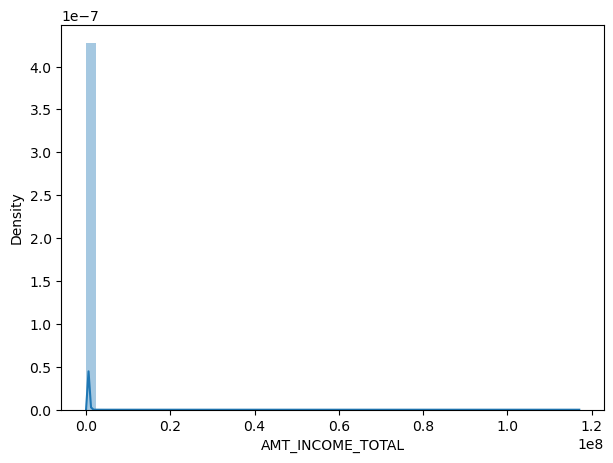

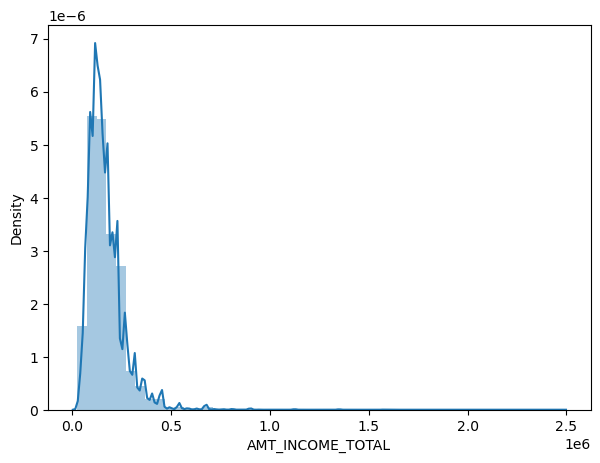

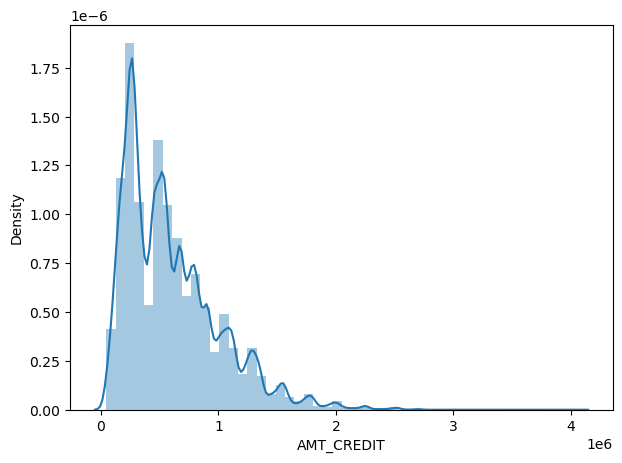

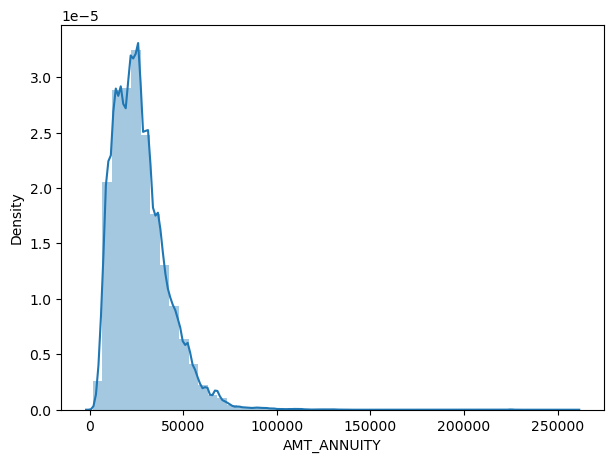

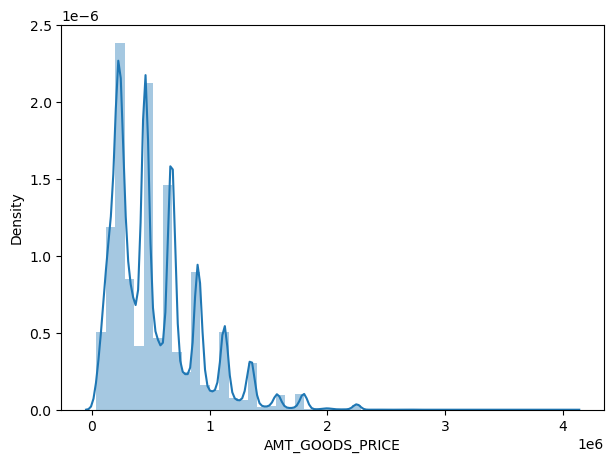

In [7]:
plt.figure(figsize=(7,5))
sns.distplot(train_df['AMT_INCOME_TOTAL'].dropna())
plt.show()

plt.figure(figsize=(7,5))
sns.distplot(train_df.loc[train_df['AMT_INCOME_TOTAL'] < 0.25e7, 'AMT_INCOME_TOTAL'].dropna())
plt.show()

plt.figure(figsize=(7,5))
sns.distplot(train_df['AMT_CREDIT'].dropna())
plt.show()

plt.figure(figsize=(7,5))
sns.distplot(train_df['AMT_ANNUITY'].dropna())
plt.show()

plt.figure(figsize=(7,5))
sns.distplot(train_df['AMT_GOODS_PRICE'].dropna())
plt.show()

## Occupation vs Income/Credit

It's notable that laborers are the largest group of loan users and exhibit the greatest variance in income. While this isn't unexpected, the average loan amounts remain relatively consistent.

More intriguingly, examining the income distribution across different job types reveals two distinct patterns:
    
    1.Tight with long tails: Seen in occupations such as accountants, cleaning staff, and managers.
    
    2.Wide with minimal tail: Observed in roles like realty agents and low-skill labor.
    
Additionally, the distribution of credit amounts appears to be fairly consistent across each occupational group.

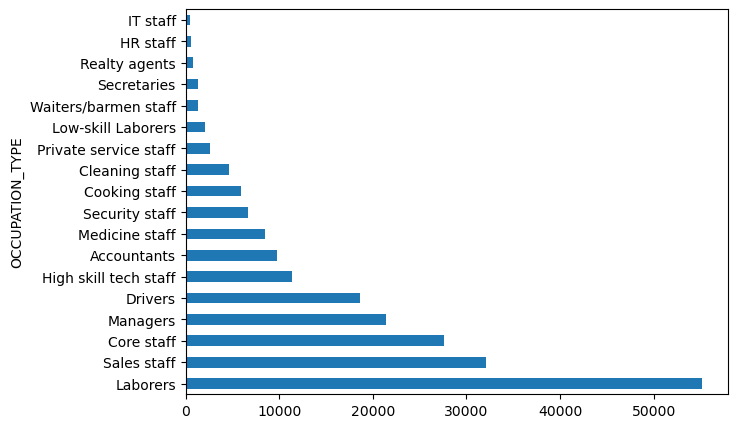

In [8]:
train_df.groupby(['OCCUPATION_TYPE'])['OCCUPATION_TYPE'].count().sort_values(ascending=False).plot(kind='barh', figsize=(7,5))
plt.show()

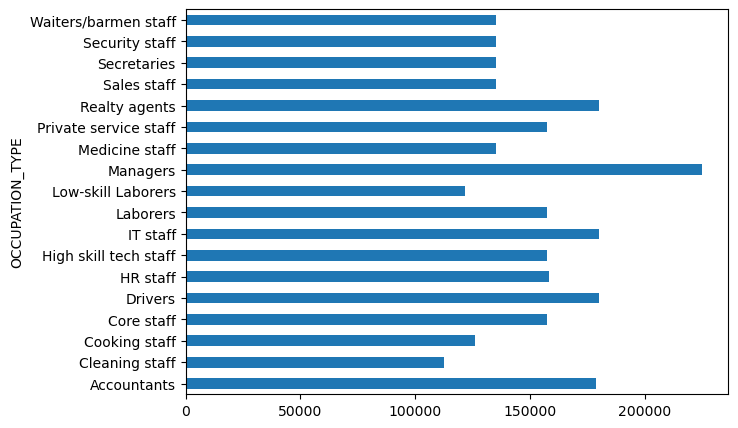

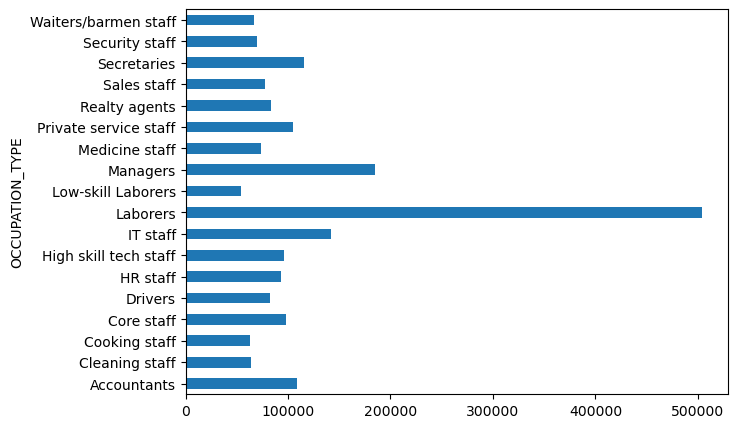

In [9]:
train_df.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].median().plot(kind='barh', figsize=(7,5))
plt.show()

train_df.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].std().plot(kind='barh', figsize=(7,5))
plt.show()

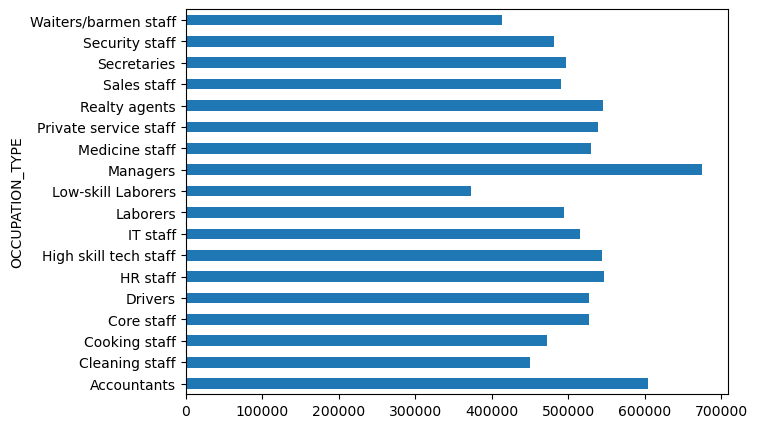

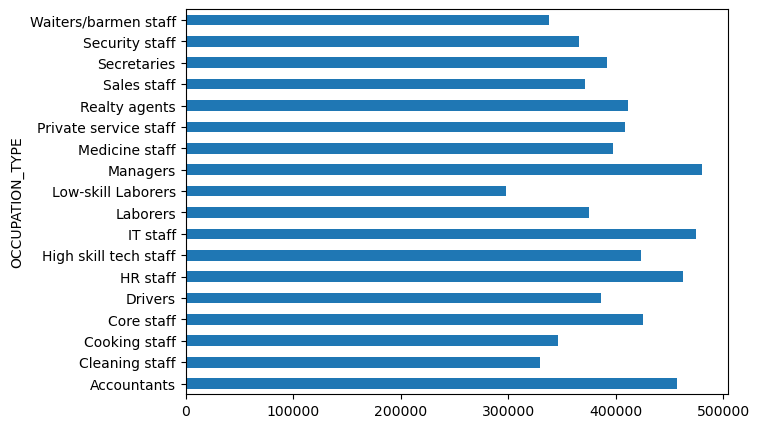

In [10]:
train_df.groupby(['OCCUPATION_TYPE'])['AMT_CREDIT'].median().plot(kind='barh', figsize=(7,5))
plt.show()

train_df.groupby(['OCCUPATION_TYPE'])['AMT_CREDIT'].std().plot(kind='barh', figsize=(7,5))
plt.show()

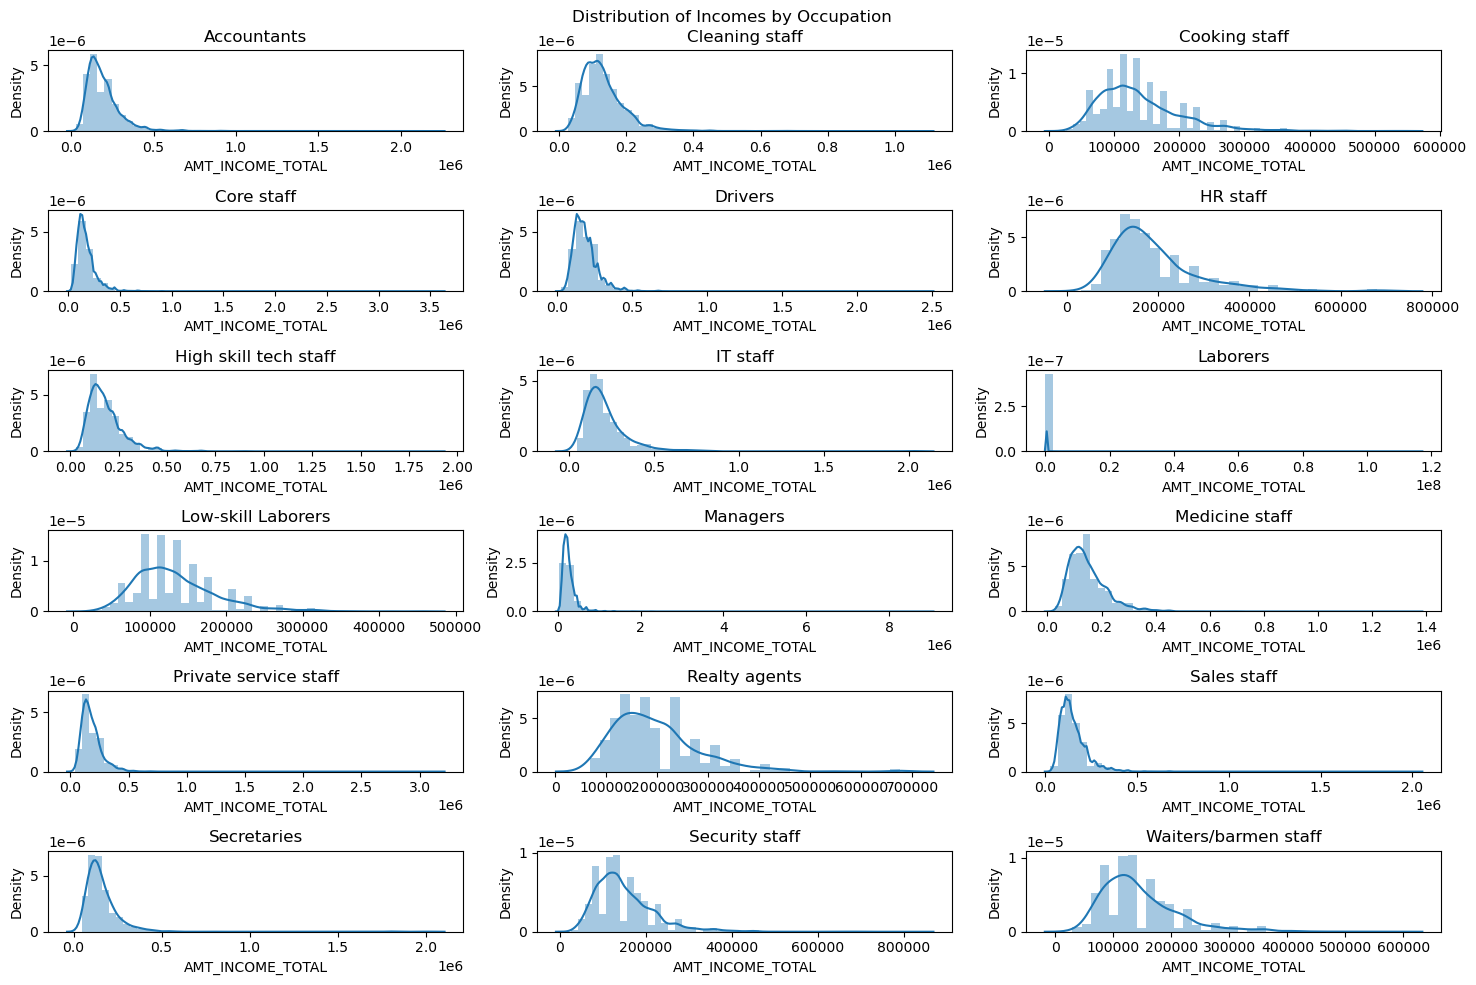

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,10))
plt.suptitle('Distribution of Incomes by Occupation')
j = 0
for i in np.unique(train_df['OCCUPATION_TYPE'].dropna()):
    sns.distplot(train_df.loc[train_df['OCCUPATION_TYPE']==i, 'AMT_INCOME_TOTAL'], ax=axes.flat[j])
    axes.flat[j].set_title(i)
    j += 1
    
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

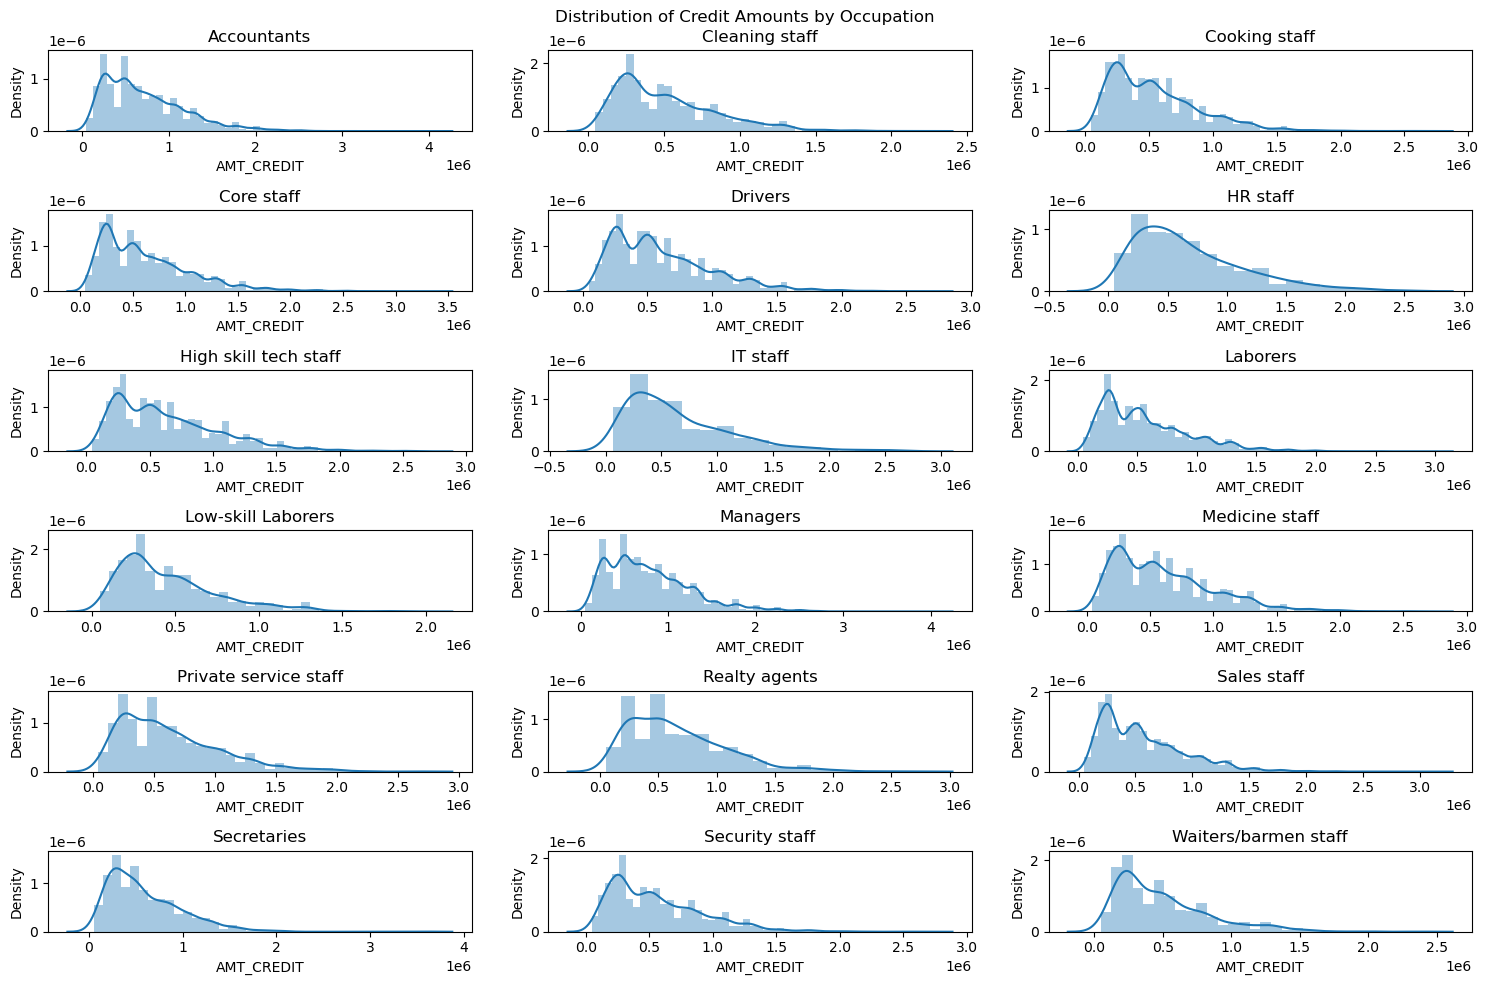

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,10))
plt.suptitle('Distribution of Credit Amounts by Occupation')
j = 0
for i in np.unique(train_df['OCCUPATION_TYPE'].dropna()):
    sns.distplot(train_df.loc[train_df['OCCUPATION_TYPE']==i, 'AMT_CREDIT'], ax=axes.flat[j])
    axes.flat[j].set_title(i)
    j += 1
    
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

## Categorical Variables - Education, living situation

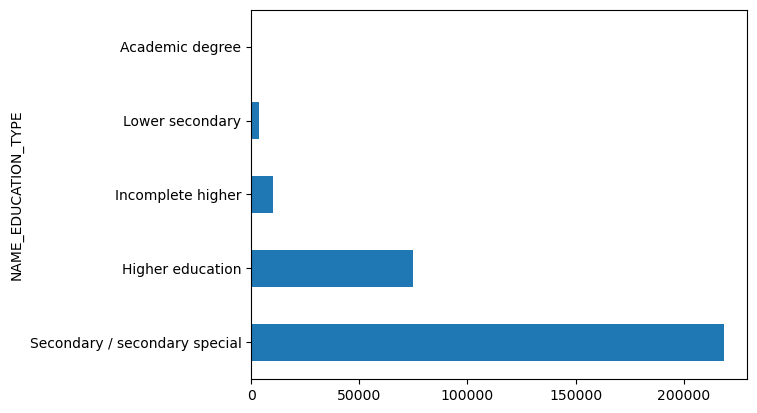

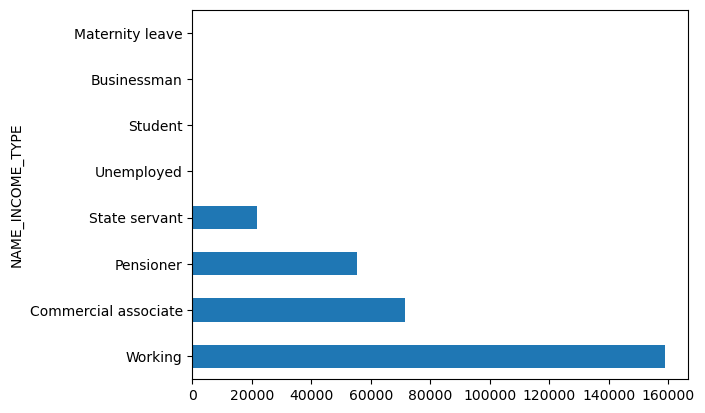

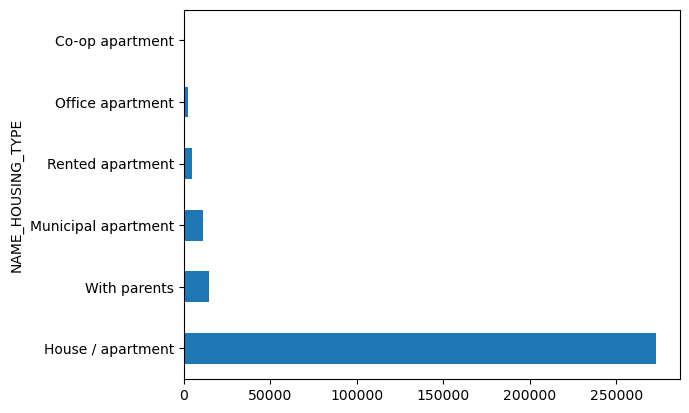

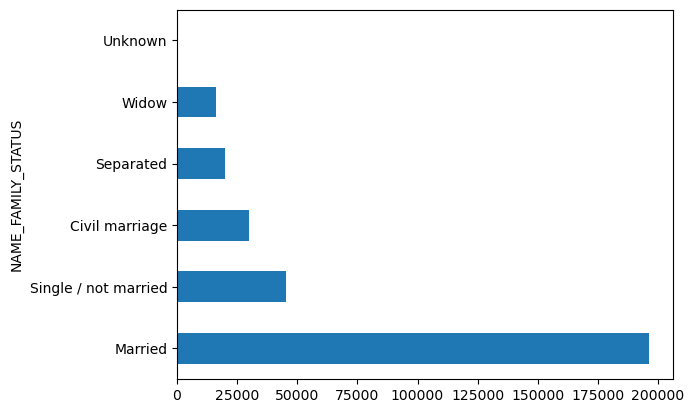

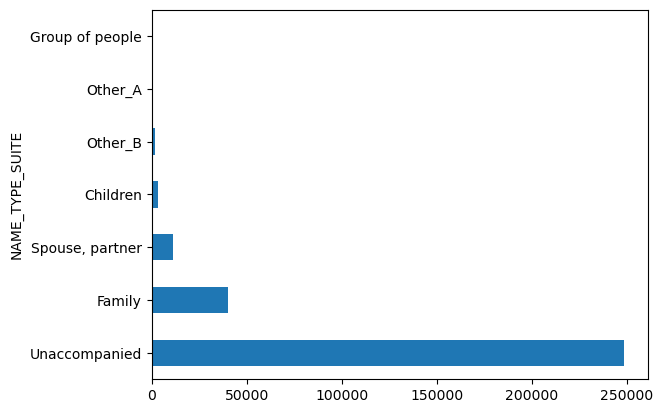

In [13]:
train_df.groupby(['NAME_EDUCATION_TYPE'])['NAME_EDUCATION_TYPE'].count().sort_values(ascending=False).plot(kind='barh')
plt.show()

train_df.groupby(['NAME_INCOME_TYPE'])['NAME_INCOME_TYPE'].count().sort_values(ascending=False).plot(kind='barh')
plt.show()

train_df.groupby(['NAME_HOUSING_TYPE'])['NAME_HOUSING_TYPE'].count().sort_values(ascending=False).plot(kind='barh')
plt.show()

train_df.groupby(['NAME_FAMILY_STATUS'])['NAME_FAMILY_STATUS'].count().sort_values(ascending=False).plot(kind='barh')
plt.show()

train_df.groupby(['NAME_TYPE_SUITE'])['NAME_TYPE_SUITE'].count().sort_values(ascending=False).plot(kind='barh')
plt.show()

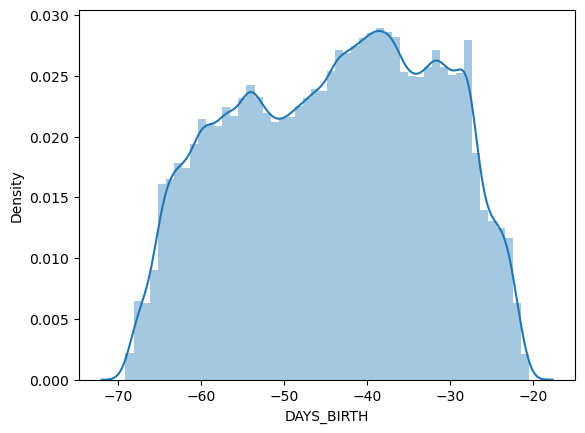

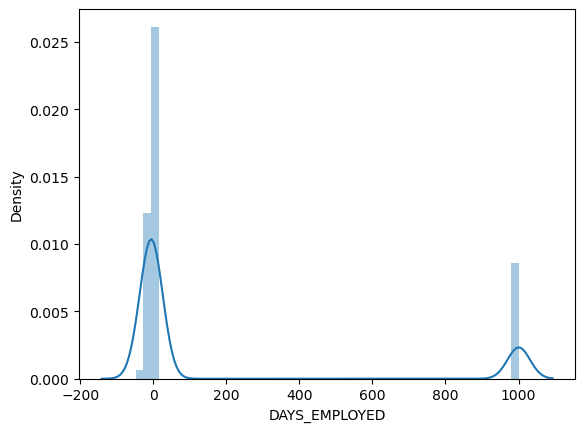

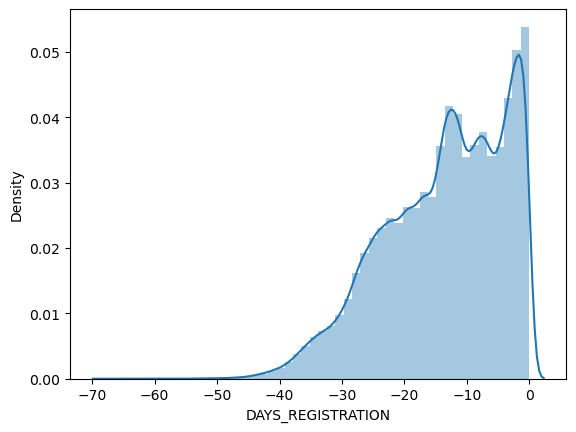

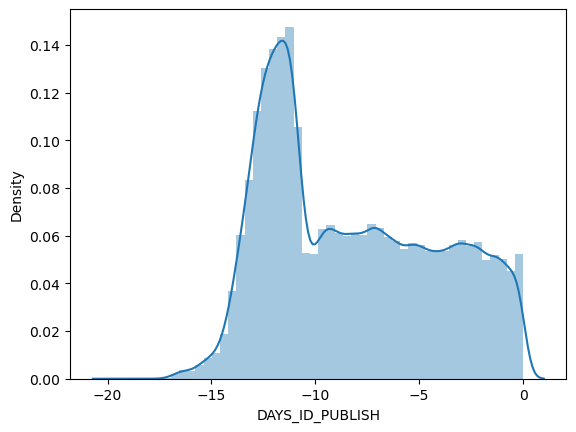

In [14]:
sns.distplot(train_df['DAYS_BIRTH']/365)
plt.show()

sns.distplot(train_df['DAYS_EMPLOYED']/365)
plt.show()

sns.distplot(train_df['DAYS_REGISTRATION']/365)
plt.show()

sns.distplot(train_df['DAYS_ID_PUBLISH']/365)
plt.show()

## Correlation across dataset

Rather than examining every aspect of the dataset, it might be more efficient to focus on identifying interesting correlation patterns across the numeric data types. This allows us to quickly uncover potential insights without delving into every detail.

In [15]:
corrs = train_df.corr()

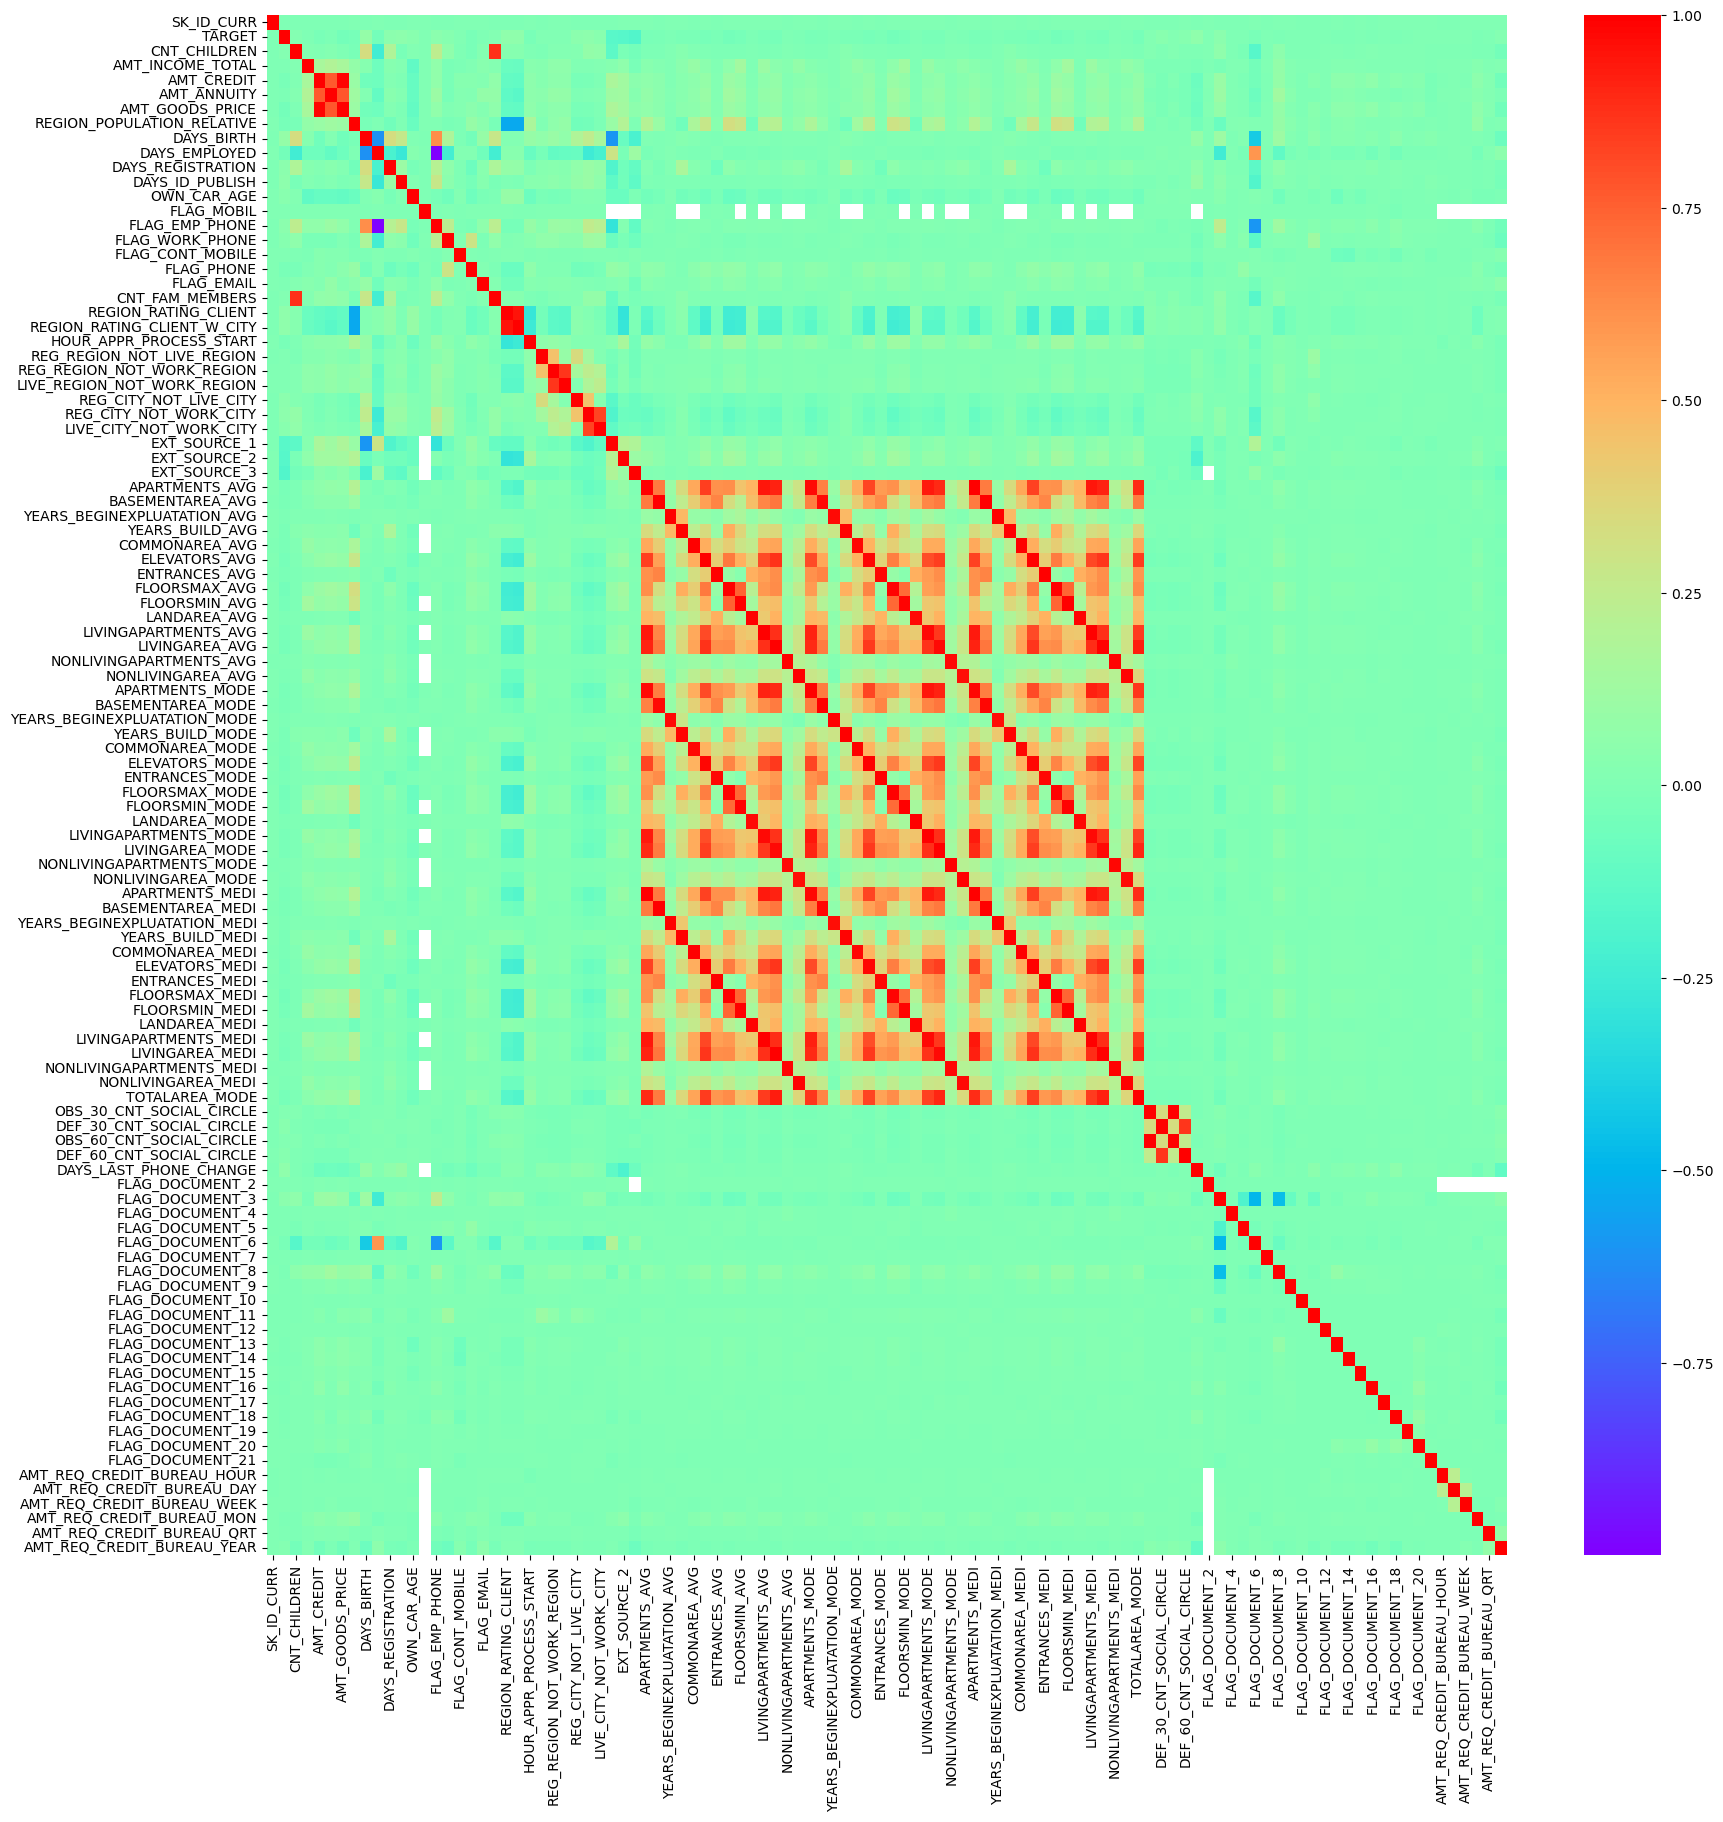

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corrs, cmap = 'rainbow')
plt.show()

We can see a nice cluster of highly correlated features, mostly pertaining to aspects of the property (not unexpected!).

<Figure size 2000x2000 with 0 Axes>

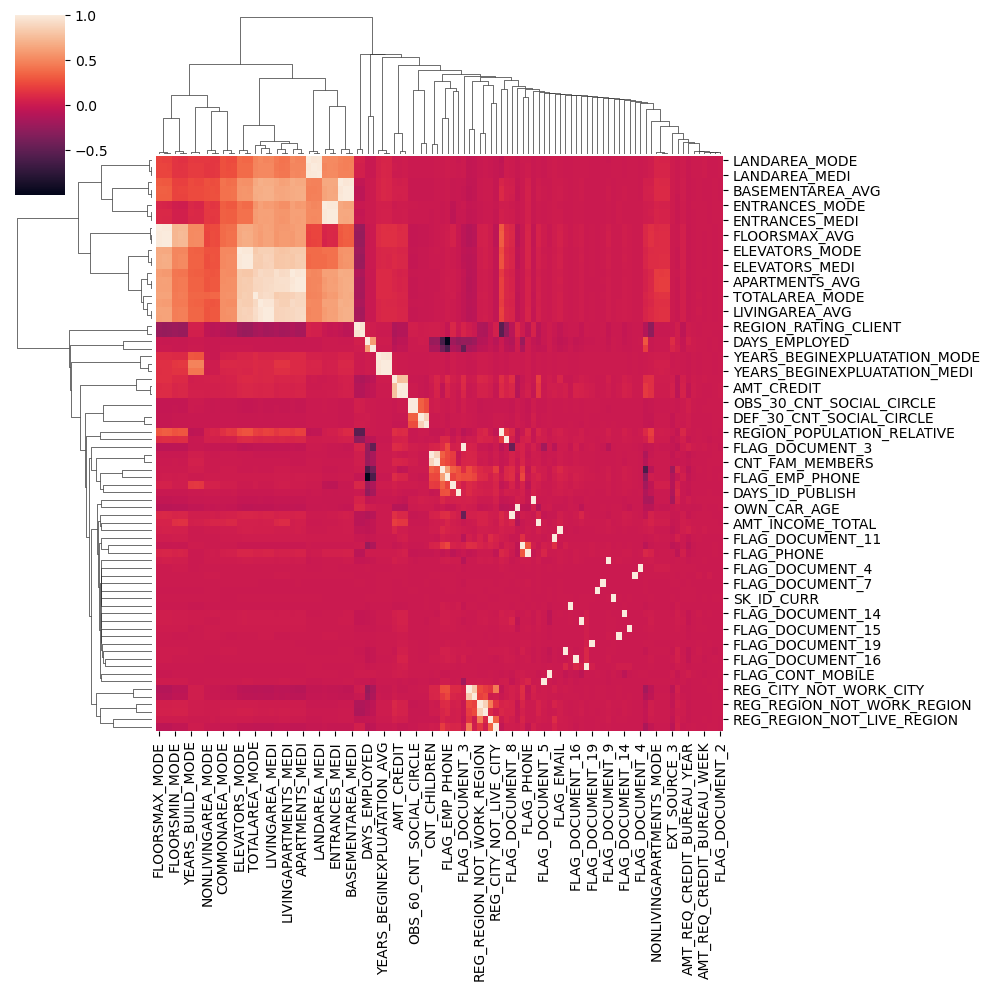

In [17]:
plt.figure(figsize=(20,20))
sns.clustermap(corrs.dropna())
plt.show()

## Import Libraries and Define Preprocessing

In [18]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [19]:
cat_f = [x for x in train_df.columns if train_df[x].dtype == 'object']

for name in cat_f:
    enc = preprocessing.LabelEncoder()
    enc.fit(list(train_df[name].values.astype('str')) + list(test_df[name].values.astype('str')))
    train_df[name] = enc.transform(train_df[name].values.astype('str'))
    test_df[name] = enc.transform(test_df[name].values.astype('str'))

In [20]:
X = train_df.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train_df['TARGET']

X.fillna(-1000, inplace=True)

## Split Data and Resample

In [21]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Train Model and Cross-Validation

In [22]:
clf = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Prepare to store results
accuracies = []

# Perform cross-validation
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model
    clf.fit(X_resampled, y_resampled)  
    
    # Make predictions
    y_pred = clf.predict(X_val)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    
    print(f"Fold Accuracy: {accuracy:.4f}")

# Print the mean accuracy across all folds
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")

Fold Accuracy: 0.9674
Fold Accuracy: 0.9675
Fold Accuracy: 0.9686
Fold Accuracy: 0.9664
Fold Accuracy: 0.9679
Mean Accuracy: 0.9676


## Evaluation

In [23]:
# Make predictions on validation set
y_val_pred_proba = clf.predict_proba(X_val)[:, 1]
y_val_pred = clf.predict(X_val)

# Classification report
print(classification_report(y_val, y_val_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     56537
           1       0.78      0.83      0.81      4965

    accuracy                           0.97     61502
   macro avg       0.88      0.91      0.89     61502
weighted avg       0.97      0.97      0.97     61502

ROC AUC Score: 0.9065


## Plotting the Confusion Matrix

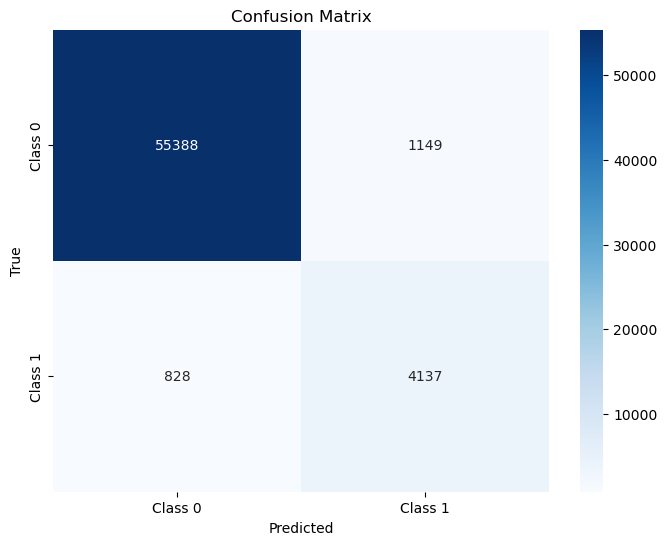

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Plotting the ROC Curve

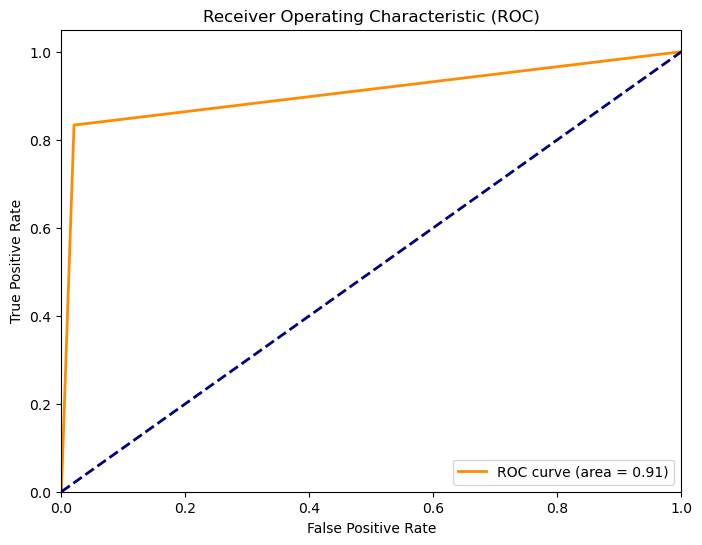

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Feature Importance

In [26]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = sorted(zip(importances, feature_names), reverse=True)

for importance, name in feature_importances:
    print(f"Feature: {name}, Importance: {importance:.4f}")

Feature: EXT_SOURCE_3, Importance: 0.2652
Feature: EXT_SOURCE_1, Importance: 0.1863
Feature: OBS_30_CNT_SOCIAL_CIRCLE, Importance: 0.0697
Feature: OWN_CAR_AGE, Importance: 0.0663
Feature: EXT_SOURCE_2, Importance: 0.0514
Feature: OBS_60_CNT_SOCIAL_CIRCLE, Importance: 0.0347
Feature: AMT_REQ_CREDIT_BUREAU_YEAR, Importance: 0.0247
Feature: FLAG_OWN_CAR, Importance: 0.0187
Feature: CNT_FAM_MEMBERS, Importance: 0.0182
Feature: AMT_REQ_CREDIT_BUREAU_MON, Importance: 0.0133
Feature: TOTALAREA_MODE, Importance: 0.0120
Feature: DAYS_BIRTH, Importance: 0.0115
Feature: DAYS_ID_PUBLISH, Importance: 0.0103
Feature: AMT_ANNUITY, Importance: 0.0102
Feature: DAYS_REGISTRATION, Importance: 0.0101
Feature: AMT_INCOME_TOTAL, Importance: 0.0093
Feature: REGION_POPULATION_RELATIVE, Importance: 0.0089
Feature: DAYS_LAST_PHONE_CHANGE, Importance: 0.0087
Feature: DAYS_EMPLOYED, Importance: 0.0085
Feature: AMT_REQ_CREDIT_BUREAU_QRT, Importance: 0.0082
Feature: DEF_30_CNT_SOCIAL_CIRCLE, Importance: 0.0078
Feat

## Validate on Test Data

In [27]:
# Evaluate on the Test Set
X_test_processed = test_df.drop(['SK_ID_CURR'], axis=1).fillna(-1000)

# Use the entire model without feature selection
y_test_pred_proba = clf.predict_proba(X_test_processed)

# Prepare submission
submission = pd.DataFrame()
submission['SK_ID_CURR'] = test_df['SK_ID_CURR']
submission['TARGET'] = y_test_pred_proba[:, 1]
submission.to_csv('submission.csv', index=False)

In [28]:
submission.head()

,SK_ID_CURR,TARGET
0,100002,1.0
1,100003,0.0
2,100004,0.0
3,100006,0.0
4,100007,0.0


## Summary

The model demonstrated strong performance with a mean accuracy of 96.76% across five cross-validation folds. The precision, recall, and F1-score for class 0 (non-difficulties) were high at 0.99, 0.98, and 0.98, respectively, indicating excellent performance in predicting non-difficult cases. For class 1 (payment difficulties), the precision, recall, and F1-score were 0.78, 0.83, and 0.81, showing a solid ability to identify clients with difficulties. The ROC AUC score of 0.9065 further confirms the model's robust discriminatory power. Overall, the model effectively balances between accuracy and the ability to identify clients at risk.